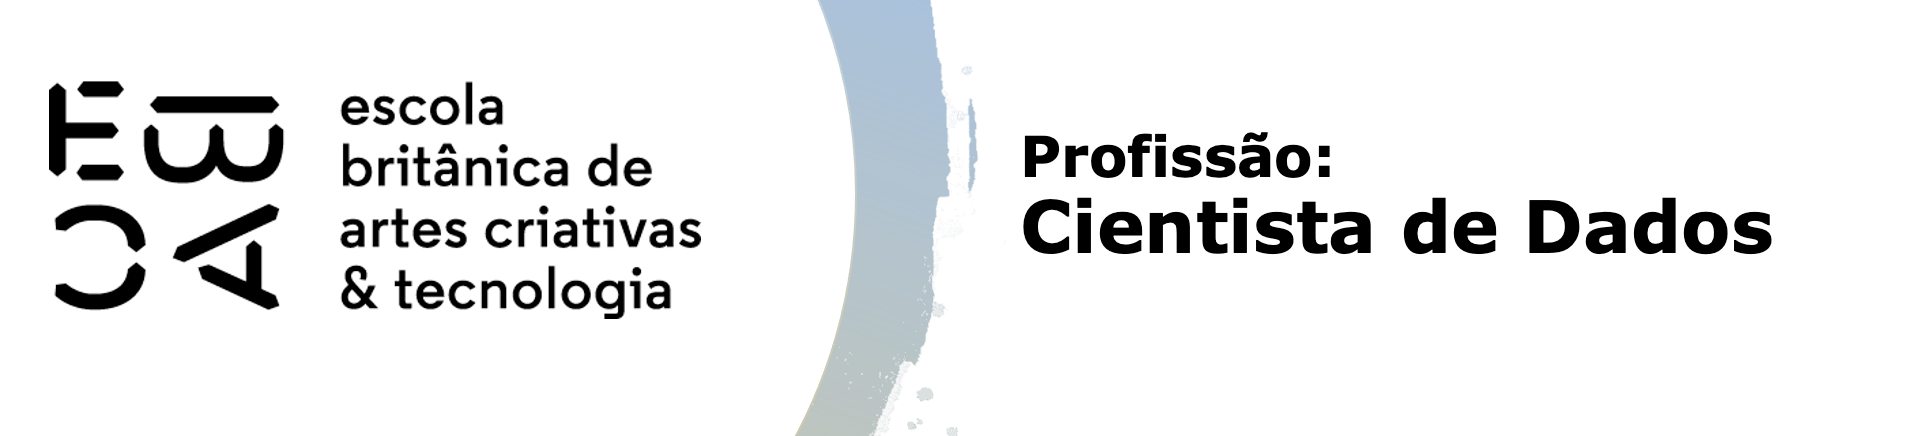

# Probabilidade - Tarefa

In [4]:
#IMPORTANDO PACOTES
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm, t

### Breve explicação:

A seguir, realizaremos a resolução de alguns exercícicos, eles tem como objetivo nos fornecer uma base sobre o assunto probabilidade. Nesses exercícios trabalharemos com a distribuição normal de probabilidade e para facilitar essa prática, foi importado o pacote **scipy** que conta com algumas funções, dentre elas:

- **stats.norm.cdf (Cumulative Distribution Function):** Dado um valor *x*, retorna a probabilidade acumulada até aquele ponto.

- **stats.norm.pdf (Probability Density Function):**  
  Retorna a densidade de probabilidade no ponto *x*, que representa a altura da curva naquele valor, mas não uma probabilidade direta. Na distribuição normal, a pdf tem uma curva em forma de sino, sabemos que quanto mais próximo um valor *x* estiver da média, mais provável ele é e mais 'alto' ele se localiza no nosso sino.

- Exemplo: Imagine uma variável representando alturas humanas, normalmente distribuídas com média 𝜇= 170cm e desvio padrão 𝜎= 10cm.

    - A PDF dirá quão "densa" ou "frequente" é uma altura específica como 170 cm (máxima densidade).
    - Para alturas próximas de 150 cm ou 190 cm, a densidade será menor, indicando que são menos comuns.
    Visualize o exemplo abaixo:
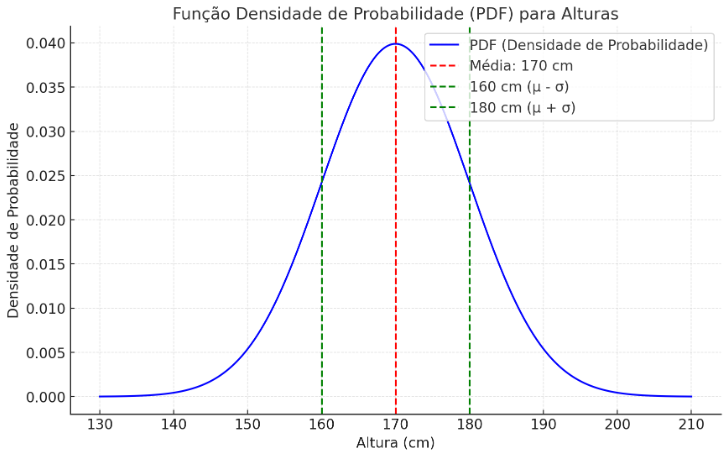

Perceba que o *y* do gráfico (densidade da probabilidade) é maior conforme os pontos se aproximam da média.

- **stats.norm.ppf (Percent Point Function):**  
    Dada uma probabilidade *p*, a função retorna o valor *x* correspondente a essa probabilidade acumulada. 

Agora que sabemos um pouco para que serve cada função, vamos exercitá-las.

### Atividades

1. Uma máquina embala ração para cachorro em pacotes de 15 kg, mas cada pacote produzido acaba tendo um peso aleatório, com distribuição Normal, com média 15kg, mas com desvio padrão 0,1 kg. Obtenha a probabilidade de que um pacote selecionado aleatoriamente dessa produção tenha mais que 15,2 kg.

*OBS: O comando da função pede para obter a probabilidade a partir de um determinado ponto. Para isso, basta calcular a probabilidade acumulada até aquele ponto usando a função cdf e subtraí-la de 1, já que a probabilidade total de uma distribuição é sempre 1.*

*Por exemplo, para descobrir a probabilidade acumulada acima do ponto 15,2, primeiro usamos a função cdf para obter a probabilidade acumulada até 15,2. Em seguida, subtraímos este valor de 1. Vamos iniciar identificando as informações principais do problema:*

In [11]:
# Definindo os parâmetros
media = 15  # kg
desvio_padrao = 0.1  # kg
limite_superior = 15.2  # kg

# Calculando a probabilidade de um pacote ter mais que 15.2 kg
probabilidade = 1 - stats.norm.cdf(limite_superior, loc=media, scale=desvio_padrao)
print(f'A probabilidade de um pacote ter mais que 15,2 kg é: {probabilidade:.4f}')

A probabilidade de um pacote ter mais que 15,2 kg é: 0.0228


Vamos observar o resultado obtido através de um gráfico:

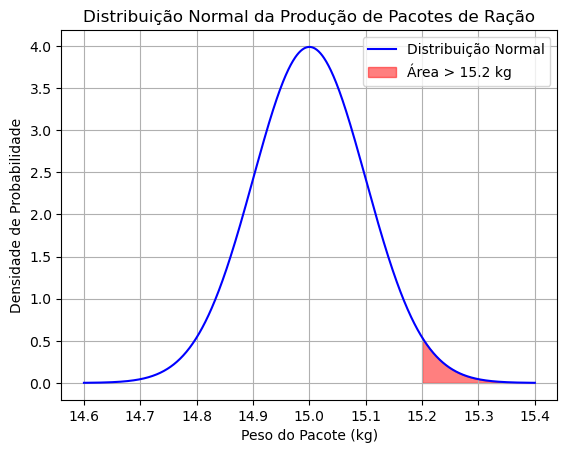

In [13]:
# Gerando valores para o eixo x
x = np.linspace(media - 4*desvio_padrao, media + 4*desvio_padrao, 1000)

# Calculando a densidade de probabilidade
pdf = stats.norm.pdf(x, loc=media, scale=desvio_padrao)

# Plotando a distribuição normal
plt.plot(x, pdf, label="Distribuição Normal", color='blue')

# Somando a área à direita de 15.2
x_fill = np.linspace(limite_superior, media + 4*desvio_padrao, 500)
pdf_fill = stats.norm.pdf(x_fill, loc=media, scale=desvio_padrao)
plt.fill_between(x_fill, pdf_fill, color='red', alpha=0.5, label=f'Área > {limite_superior} kg')

# Adicionando títulos e rótulos
plt.title("Distribuição Normal da Produção de Pacotes de Ração")
plt.xlabel("Peso do Pacote (kg)")
plt.ylabel("Densidade de Probabilidade")
plt.legend()

# Exibindo o gráfico
plt.grid(True)
plt.show()


O gráfico ilustra como a distribuição de probabilidade se comporta. Note que a média representa o ponto onde a probabilidade acumulada se divide igualmente: 50% à esquerda e 50% à direita. **Neste caso, estamos interessados apenas na probabilidade a partir do ponto 15,2, que corresponde à pequena área colorida sob a curva à direita desse valor. De acordo com a informação fornecida no código anterior, essa área representa 2,28% da distribuição acumulada, indicando que apenas uma fração muito pequena dos valores está acima de 15,2.**

2. Da máquina descrita acima, obtenha o percentil de ordem 95% para o peso dos pacotes. Ou seja, o valor tal que a probabilidade de um pacote ter peso menor que este seja de 95%.

*De acordo com o problema, devemos encontrar o valor de *x* para o qual a distribuição acumulada seja 95%,para isso, utilizamos a função pdf. Quando encontramos esse ponto no eixo x, significa que à sua esquerda temos probabilidade acumulada de 95% e a sua direita de 5%, logo, teremos 95% de probabilidade dos pesos serem menores que esse valor. Vamos descobrir qual valor é esse.*

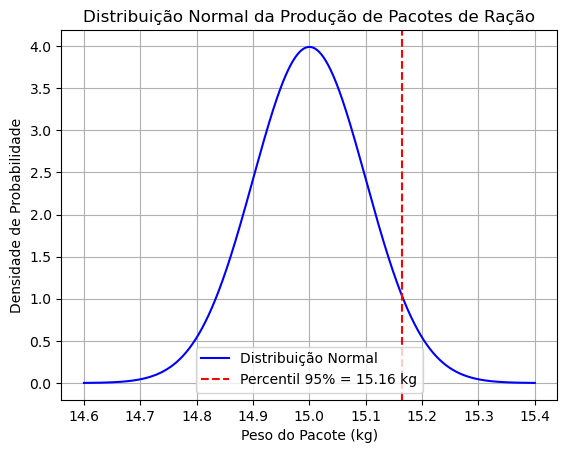

In [17]:
# Definindo os parâmetros
media = 15  # kg
desvio_padrao = 0.1  # kg
percentil = 0.95  # 95%

# Calculando o percentil de ordem 95%
percentil_95 = stats.norm.ppf(percentil, loc=media, scale=desvio_padrao)

# Gerando valores para o eixo x
x = np.linspace(media - 4*desvio_padrao, media + 4*desvio_padrao, 1000)

# Calculando a densidade de probabilidade
pdf = stats.norm.pdf(x, loc=media, scale=desvio_padrao)

# Plotando a distribuição normal
plt.plot(x, pdf, label="Distribuição Normal", color='blue')

# Destacando o percentil de 95%
plt.axvline(percentil_95, color='red', linestyle='--', label=f'Percentil 95% = {percentil_95:.2f} kg')

# Adicionando títulos e rótulos
plt.title("Distribuição Normal da Produção de Pacotes de Ração")
plt.xlabel("Peso do Pacote (kg)")
plt.ylabel("Densidade de Probabilidade")
plt.legend()

# Exibindo o gráfico
plt.grid(True)
plt.show()


De acordo com o gráfico acima, temos que 95% dos pacotes tem valores menores que 15,16kg.

3. Suponha duas variáveis aleatórias $Y_1$ e $Y_2$, a primeira com distribuição Normal Padrão (média=0, variância=1), a segunda com distribuição *t-studdent* com 5 graus de liberdade (também padrão). Calcule, para cada uma, a probabilidade de ser menor que cada um dos valores contidos no objeto $Y$ na célula abaixo:

*Para calcular a probabilidade de \( Y_1 \) e \( Y_2 \) serem menores que os valores contidos no objeto \( Y \), utilizamos a função `cdf`. A única diferença é que, para \( Y_1 \), que segue uma distribuição normal padrão, utilizaremos a `cdf` da distribuição normal. Já para \( Y_2 \), que segue uma distribuição t-Student com 5 graus de liberdade, utilizaremos a `cdf` correspondente à distribuição t-Student.*


In [21]:
Y=np.linspace(-6, 6, 200)
# Seu código começa aqui

# Distribuição Normal Padrão
prob_normal = norm.cdf(Y)  # Calcula a probabilidade acumulada para cada valor em Y

# Distribuição t-Student com 5 graus de liberdade
df = 5  # graus de liberdade
prob_t_student = t.cdf(Y, df)  # Calcula a probabilidade acumulada para cada valor em Y

# Exibindo os resultados para algumas amostras
for y, p_norm, p_t in zip(Y[::40], prob_normal[::40], prob_t_student[::40]):  # Amostrando os valores para exibição
    print(f"Y = {y:.2f}: P(Normal <= Y) = {p_norm:.4f}, P(t-student <= Y) = {p_t:.4f}")


Y = -6.00: P(Normal <= Y) = 0.0000, P(t-student <= Y) = 0.0009
Y = -3.59: P(Normal <= Y) = 0.0002, P(t-student <= Y) = 0.0079
Y = -1.18: P(Normal <= Y) = 0.1198, P(t-student <= Y) = 0.1463
Y = 1.24: P(Normal <= Y) = 0.8918, P(t-student <= Y) = 0.8644
Y = 3.65: P(Normal <= Y) = 0.9999, P(t-student <= Y) = 0.9926


Podemos obervar que a t-Student tem uma probabilidade acumulada maior para valores anteriores à mediana (devido às caudas mais largas), e menos para valores posteriores à média/mediana (ambas nesse caso são as mesmas), o inverso ocorre com a normal. Vejamos graficamente esse comportamento:

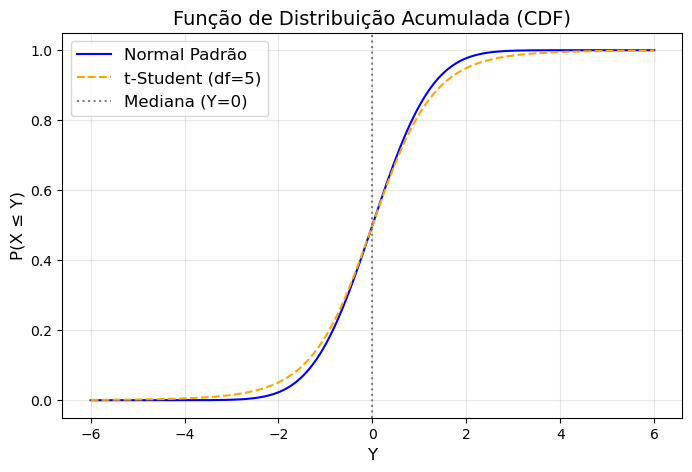

In [46]:
# Definindo o intervalo de valores para Y
Y = np.linspace(-6, 6, 200)

# Calcula as probabilidades acumuladas
prob_normal = norm.cdf(Y)  # CDF da distribuição Normal
prob_t_student = t.cdf(Y, df=5)  # CDF da distribuição t-Student com 5 graus de liberdade

# Configuração do gráfico
plt.figure(figsize=(8, 5))
plt.plot(Y, prob_normal, label='Normal Padrão', color='blue')
plt.plot(Y, prob_t_student, label='t-Student (df=5)', color='orange', linestyle='--')

# Adicionando uma única linha vertical para a mediana
plt.axvline(0, color='gray', linestyle=':', linewidth=1.5, label='Mediana (Y=0)')

# Personalização
plt.title('Função de Distribuição Acumulada (CDF)', fontsize=14)
plt.xlabel('Y', fontsize=12)
plt.ylabel('P(X ≤ Y)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Exibe o gráfico
plt.show()

Observando o gráfico é possível perceber que exatamente o que foi descrito anteriormente, esse comportamento é uma característica típica da t-Student em relação à distribuição normal, uma vez que ela possui caudas mais pesadas.

5. 3. Suponha duas variáveis aleatórias $Y_1$ e $Y_2$, a primeira com distribuição Normal Padrão (média=0, variância=1), a segunda com distribuição *t-studdent* com 5 graus de liberdade (também padrão). Calcule, para cada uma, o percentil (a inversa da *CDF*) para cada um dos valores do objeto *P* abaixo:

In [26]:
# Array P de probabilidades
P = np.linspace(0, 1, 20)

# Percentis para a Distribuição Normal Padrão
percentis_normal = norm.ppf(P)  # Inversa da CDF para a distribuição Normal

# Percentis para a Distribuição t-Student com 5 graus de liberdade
df = 5  # graus de liberdade
percentis_t_student = t.ppf(P, df)  # Inversa da CDF para a distribuição t-Student

# Exibindo os resultados
for p, q_norm, q_t in zip(P, percentis_normal, percentis_t_student):
    print(f"P = {p:.2f}: Percentil Normal = {q_norm:.4f}, Percentil t-student = {q_t:.4f}")


P = 0.00: Percentil Normal = -inf, Percentil t-student = -inf
P = 0.05: Percentil Normal = -1.6199, Percentil t-student = -1.9749
P = 0.11: Percentil Normal = -1.2521, Percentil t-student = -1.4359
P = 0.16: Percentil Normal = -1.0031, Percentil t-student = -1.1144
P = 0.21: Percentil Normal = -0.8046, Percentil t-student = -0.8761
P = 0.26: Percentil Normal = -0.6336, Percentil t-student = -0.6807
P = 0.32: Percentil Normal = -0.4795, Percentil t-student = -0.5103
P = 0.37: Percentil Normal = -0.3360, Percentil t-student = -0.3553
P = 0.42: Percentil Normal = -0.1992, Percentil t-student = -0.2098
P = 0.47: Percentil Normal = -0.0660, Percentil t-student = -0.0694
P = 0.53: Percentil Normal = 0.0660, Percentil t-student = 0.0694
P = 0.58: Percentil Normal = 0.1992, Percentil t-student = 0.2098
P = 0.63: Percentil Normal = 0.3360, Percentil t-student = 0.3553
P = 0.68: Percentil Normal = 0.4795, Percentil t-student = 0.5103
P = 0.74: Percentil Normal = 0.6336, Percentil t-student = 0.6

Vamos observar esses dados através de um gráfico:

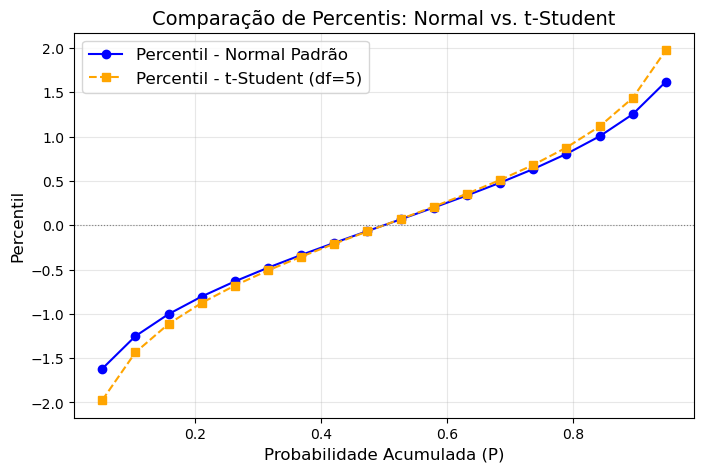

In [28]:
# Array P de probabilidades
P = np.linspace(0, 1, 20)

# Percentis
percentis_normal = norm.ppf(P)  # Inversa da CDF para a Normal
percentis_t_student = t.ppf(P, df=5)  # Inversa da CDF para a t-Student

# Configuração do gráfico
plt.figure(figsize=(8, 5))
plt.plot(P, percentis_normal, label='Percentil - Normal Padrão', color='blue', marker='o')
plt.plot(P, percentis_t_student, label='Percentil - t-Student (df=5)', color='orange', linestyle='--', marker='s')

# Personalização
plt.title('Comparação de Percentis: Normal vs. t-Student', fontsize=14)
plt.xlabel('Probabilidade Acumulada (P)', fontsize=12)
plt.ylabel('Percentil', fontsize=12)
plt.axhline(0, color='gray', linestyle=':', linewidth=0.8)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Exibe o gráfico
plt.show()


Se compararmos esse gráfico ao anterior, iremos perceber que aqui primeiro t-Student assume valores menores e depois valores maiores que a mediana (50% do acumulo), isso ocorre porque ele mostra basicamente o contrário do gráfico anterior. Enquanto a função CDF utilizada no gráfico anterior nos permite encontrar a probabilidade acumulada abaixo de um ponto, a função PPF utilizada nesse gráfico nos permite encontrar o ponto associado a determinada probabilidade acumulada.

Mas e quando é mais recomendado utilizar a t-Student em vez da normal?

- Quando temos a variância populacional desconhecida;
- Quando o tamanho da amostra for pequeno. 

A t-Student é mais adequada para esses casos porque ela leva em consideração a incerteza adicional associada à estimativa da variância da população.

FIM!